In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [365]:
data = pd.read_csv('learningSet.csv')
data.shape

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_29395/3302850674.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


(95412, 481)

In [366]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [367]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

# Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns

In [368]:
data.isnull().sum()

ODATEDW       0
OSOURCE     928
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    319
Length: 481, dtype: int64

In [369]:
categorical = data.select_dtypes(object)
categorical.head()
categorical.shape

(95412, 74)

In [370]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
columns_w_nulls = nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,PVASTATE,0.984719
2,NOEXCH,0.000073
3,RECINHSE,0.929747
4,RECP3,0.978860
...,...,...
59,RFA_21,0.369052
60,RFA_22,0.268813
61,RFA_23,0.589800
62,RFA_24,0.387509


- Exclude the following variables by looking at the definitions. Create a new empty list called `drop_list`. We will append this list and then drop all the columns in this list later:
    - `OSOURCE` - symbol definitions not provided, too many categories
    - `ZIP` - we are including state already

In [371]:
drop_list = []
drop_list.extend(["OSOURCE", "ZIP"])
drop_list

['OSOURCE', 'ZIP']

- Identify columns that have over 50% missing values.

In [372]:
columns_above_threshold = columns_w_nulls[columns_w_nulls['nulls_percentage']>0.5]
columns_above_threshold['column_name']
drop_columns_list = list(columns_above_threshold['column_name'])
drop_list.extend(drop_columns_list)
len(drop_list)

38

KEEPING VETERANS AND SOLIH, TO MATCH THE NEEDS

In [373]:
names_to_remove = ["VETERANS", "SOLIH"]

for name in names_to_remove:
    if name in drop_list:
        drop_list.remove(name)
    
len(drop_columns_list)

36

- Remove those columns from the dataframe

In [374]:
data = data.drop(drop_list, axis=1)


In [375]:
data.shape

(95412, 445)

## - Perform all of the cleaning processes from the Lesson.

 - Remove columns with null values greater than a specified threshold (0.25 of all the dataframe) KEEPING: "WEALTH1", "WEALTH2" ,"VETERANS", "SOLIH"

In [376]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [377]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']
drop_columns_list = list(columns_above_threshold['column_name'])
len(drop_columns_list)

83

In [378]:
names_to_remove = ["WEALTH1", "WEALTH2" ,"VETERANS", "SOLIH"]

for name in names_to_remove:
    if name in drop_columns_list:
        drop_columns_list.remove(name)
    
len(drop_columns_list)

79

In [379]:
data = data.drop(drop_columns_list, axis=1)
data.shape

(95412, 366)

REPLACE NAN IN VETERANS FOR N

In [380]:
data["VETERANS"].unique()

array([nan, 'Y'], dtype=object)

In [381]:
data['VETERANS'] = data['VETERANS'].fillna("N")
data["VETERANS"].unique()

array(['N', 'Y'], dtype=object)

REDUCING STATES

In [382]:
df = pd.DataFrame(data['STATE'].value_counts()).reset_index()
df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
data['STATE'] = list(map(clean_state, data['STATE']))

In [383]:
data["STATE"].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

- Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest
    - Note that there are a few null values in the column. We will first replace those null values using the code below:

    ```python
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')
    ```

In [384]:
data['GENDER'].isna().sum()

2957

In [385]:
data['GENDER'] = data['GENDER'].fillna("F")
data["GENDER"].unique()

array(['F', 'M', 'C', 'U', 'J', 'A'], dtype=object)

In [386]:
data['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [387]:
df = pd.DataFrame(data['GENDER'].value_counts()).reset_index()
df.columns = ['gender', 'count']
df

,gender,count
0,F,54234
1,M,39094
2,U,1715
3,J,365
4,C,2
5,A,2


In [388]:
unique_values = df['gender'].unique()
other_genders = [value for value in unique_values if value not in ["F", "M"]]
other_genders


['U', 'J', 'C', 'A']

In [389]:
def clean_gender(x):
    if x in other_genders:
        return 'other'
    else:
        return x
    
data['GENDER'] = list(map(clean_gender, data['GENDER']))
data["GENDER"].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

Adding lesson code

In [390]:
data['DOMAIN'] = data['DOMAIN'].fillna('R2')
data['DOMAIN_A'] = list(map(lambda x: x[0], data['DOMAIN']))
data['DOMAIN_B'] = list(map(lambda x: x[1], data['DOMAIN']))
data = data.drop(columns=['DOMAIN'])

In [391]:
drop_list_1 = ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [392]:
data['CLUSTER'] = data['CLUSTER'].fillna('40')

In [393]:
data['DATASRCE'] = data['DATASRCE'].fillna('0')

In [394]:
data['GEOCODE2'] = data['GEOCODE2'].fillna('A')

In [395]:
data = data.loc[:, ~data.columns.str.startswith('ADATE_')]


In [396]:
data['HOMEOWNR'] = data['HOMEOWNR'].fillna('U') 

In [397]:
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list_1.append(col_name)      

In [398]:
drop_list_1.remove('RFA_2R')
drop_list_1 = [item for item in drop_list_1 if item not in ('RFA_2A', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24')]
drop_list_1

['MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [399]:
data = data.drop(columns=drop_list_1)

In [400]:
data["SOLIH"].value_counts(dropna=False)

NaN    89212
12      5693
0        296
1         94
2         75
3         19
4         16
6          7
Name: SOLIH, dtype: int64

In [401]:
#ASSUMPTION SPAM EVERYONE ONCE A MONTH: NAN = 12
data['SOLIH'] = data['SOLIH'].fillna('12') 

In [402]:
categorical = data.select_dtypes(object)

In [403]:
categorical.isna().sum()

STATE       0
MAILCODE    0
NOEXCH      7
MDMAUD      0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
SOLIH       0
VETERANS    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

# LAB 2

In [404]:
numerical = data.select_dtypes(include=[np.number])

In [405]:
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292

- Check for null values in the numerical columns.

In [406]:
nulls_percent_num = pd.DataFrame(numericals.isna().sum()/len(numericals)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_w_nulls_num = nulls_percent_num[nulls_percent_num['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls_num

,column_name,nulls_percentage
0,AGE,0.248030
1,INCOME,0.223096
2,WEALTH1,0.468830
3,WEALTH2,0.459303
4,MSA,0.001383
5,ADI,0.001383
6,DMA,0.001383
7,NEXTDATE,0.104526
8,TIMELAG,0.104526
9,CLUSTER2,0.001383


Adding lesson cleaning

In [407]:
data['AGE'] = data["AGE"].fillna(np.mean(data['AGE']))

In [408]:
data['INCOME'] = data['INCOME'].fillna(5.0)

In [409]:
data['CLUSTER2'] = data['CLUSTER2'].fillna(np.ceil(np.mean(data['CLUSTER2'])))

In [410]:
data['TIMELAG'] = data['TIMELAG'].fillna(0)

Checking numericals to clean after applying lesson's cleaning

In [411]:
numerical = data.select_dtypes(include=[np.number])

In [412]:
nulls_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_w_nulls_num = nulls_percent_num[nulls_percent_num['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls_num

,column_name,nulls_percentage
0,WEALTH1,0.468830
1,WEALTH2,0.459303
2,MSA,0.001383
3,ADI,0.001383
4,DMA,0.001383
5,NEXTDATE,0.104526


# Cleaning Nan

WEALTH1 AND WEALTH2

In [413]:
data["WEALTH1"].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [414]:
data["WEALTH2"].value_counts(dropna=False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

Decision: dropn WEALTH1

In [415]:
data = data.drop("WEALTH1", axis=1)

WEALTH 2:  Nan = 0

In [417]:
data["WEALTH2"] = data['WEALTH2'].fillna(0)

MSA, substitute Nan for the mode = 0

In [418]:
data["MSA"].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [423]:
data['MSA'] = data['MSA'].fillna(0)

ADI

In [424]:
data["ADI"].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_29395/763747731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['ADI'])


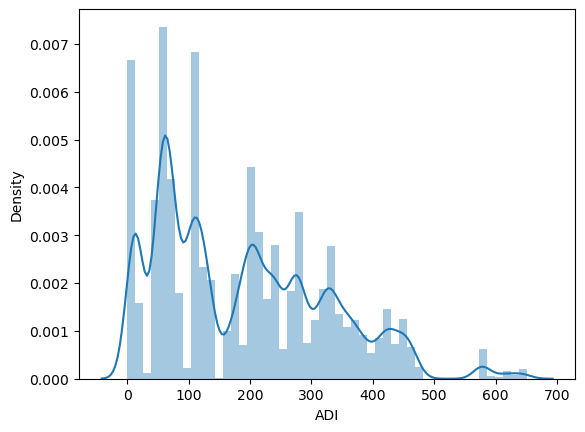

In [425]:
sns.distplot(numerical['ADI'])
plt.show()

DECISION: SUBSTITUTE FOR MEAN

In [426]:
data['ADI'] = data['ADI'].fillna(np.ceil(np.mean(data['ADI'])))

DMA

In [427]:
data["DMA"].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_29395/1332464480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['DMA'])


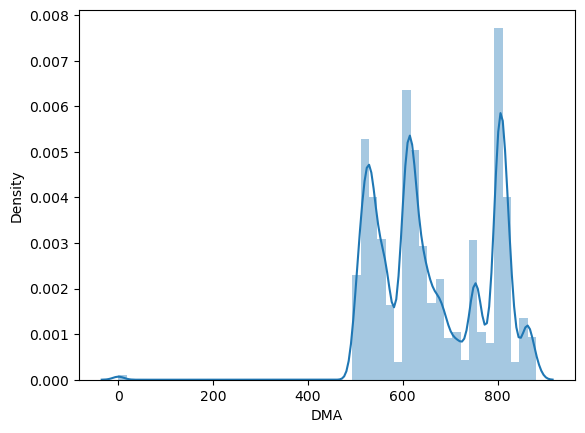

In [428]:
sns.distplot(numerical['DMA'])
plt.show()

DECISION: SUBSTITUTE FOR MEAN

In [429]:
data['DMA'] = data['DMA'].fillna(np.ceil(np.mean(data['DMA'])))

NEXTDATE

In [430]:
data["NEXTDATE"].value_counts(dropna=False)

NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: NEXTDATE, Length: 189, dtype: int64

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_29395/2905960302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['NEXTDATE'])


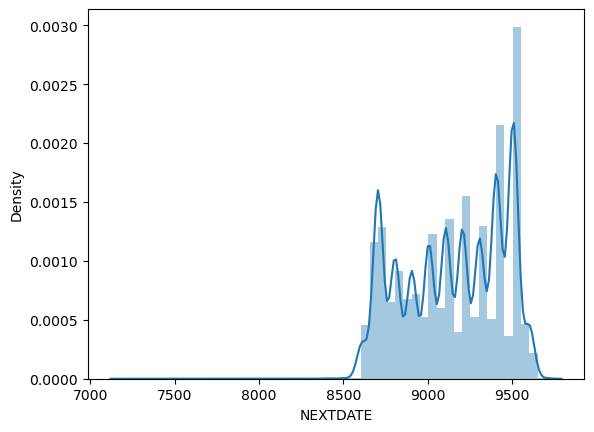

In [431]:
sns.distplot(numerical['NEXTDATE'])
plt.show()

DECISION: DROP NEXT DATE

In [432]:
data = data.drop("NEXTDATE", axis=1)

In [436]:
nulls_percent_num = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_w_nulls_num = nulls_percent_num[nulls_percent_num['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls_num

,column_name,nulls_percentage
0,NOEXCH,0.000073


DROP NOEXCH

In [437]:
data = data.drop("NOEXCH", axis=1)